In [112]:
import pandas as pd
import matplotlib.pyplot as plt


In [113]:
#path to data
path = 'data/'

In [114]:
#stocks to assess in the portfolio analysis
stocks = ['AAPL', 'TSLA', 'GOOGL', 'ZI', 'AMGN', 'INTC']

In [115]:
df = pd.DataFrame(columns=['date'])

for ticker in stocks:
    data = pd.read_csv(path+ticker+'.csv')
    print(data.shape)
    df = pd.merge(df, data[['date', 'close']], on='date', how='outer', suffixes=(ticker, ticker))

#rename column names with Ticker values
df.columns = ['date'] + [i for i in stocks]


(11019, 6)
(3566, 6)
(5040, 6)
(1065, 6)
(10384, 6)
(13265, 6)


In [116]:
#convert dates to datetime
df['date'] = pd.to_datetime(df['date'])

#sort dates
df = df.sort_values(by='date')

# Reset the index
df.reset_index(drop=True, inplace=True)

In [117]:
df

,date,AAPL,TSLA,GOOGL,ZI,AMGN,INTC
0,1972-01-07,NaN,NaN,NaN,NaN,NaN,0.013861
1,1972-01-14,NaN,NaN,NaN,NaN,NaN,0.006887
2,1972-01-21,NaN,NaN,NaN,NaN,NaN,0.006887
3,1972-01-24,NaN,NaN,NaN,NaN,NaN,0.006887
4,1972-01-25,NaN,NaN,NaN,NaN,NaN,0.006887
...,...,...,...,...,...,...,...
13260,2024-08-21,226.40,223.270,165.85,9.69,329.15,21.410000
13261,2024-08-22,224.53,210.660,163.82,9.52,324.72,20.120000
13262,2024-08-23,226.84,220.320,165.62,9.72,328.80,20.540000
13263,2024-08-26,227.22,213.235,166.16,9.80,326.90,20.140000


<Axes: >

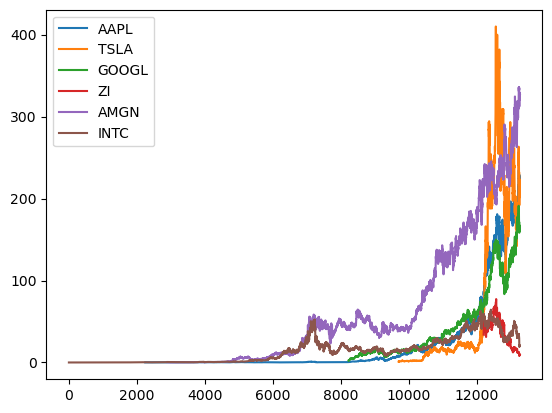

In [118]:
df[stocks].plot()

In [119]:
df_daily_ROR = pd.DataFrame()
df_daily_ROR[stocks] = (df[stocks].diff()/df[stocks].shift(1))*100
df_daily_ROR['date'] = df['date']


<Axes: >

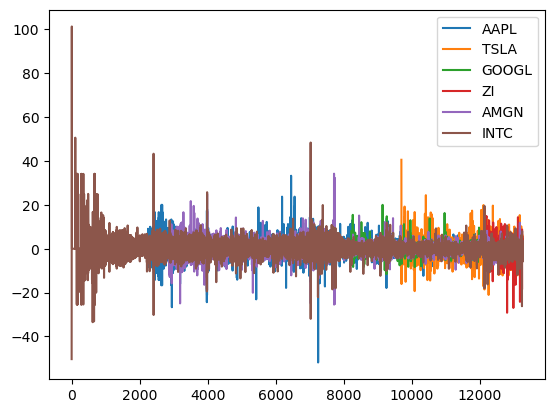

In [120]:
df_daily_ROR[stocks].plot()

In [121]:
df

,date,AAPL,TSLA,GOOGL,ZI,AMGN,INTC
0,1972-01-07,NaN,NaN,NaN,NaN,NaN,0.013861
1,1972-01-14,NaN,NaN,NaN,NaN,NaN,0.006887
2,1972-01-21,NaN,NaN,NaN,NaN,NaN,0.006887
3,1972-01-24,NaN,NaN,NaN,NaN,NaN,0.006887
4,1972-01-25,NaN,NaN,NaN,NaN,NaN,0.006887
...,...,...,...,...,...,...,...
13260,2024-08-21,226.40,223.270,165.85,9.69,329.15,21.410000
13261,2024-08-22,224.53,210.660,163.82,9.52,324.72,20.120000
13262,2024-08-23,226.84,220.320,165.62,9.72,328.80,20.540000
13263,2024-08-26,227.22,213.235,166.16,9.80,326.90,20.140000


In [124]:
df_daily_ROR

,AAPL,TSLA,GOOGL,ZI,AMGN,INTC,date,NVDA
0,NaN,NaN,NaN,NaN,NaN,NaN,1972-01-07,NaN
1,NaN,NaN,NaN,NaN,NaN,-50.317221,1972-01-14,NaN
2,NaN,NaN,NaN,NaN,NaN,0.000000,1972-01-21,NaN
3,NaN,NaN,NaN,NaN,NaN,0.000000,1972-01-24,NaN
4,NaN,NaN,NaN,NaN,NaN,0.000000,1972-01-25,NaN
...,...,...,...,...,...,...,...,...
13260,-0.048563,0.984654,-0.804450,-0.205973,0.182621,2.000953,2024-08-21,0.009728
13261,-0.825972,-5.647870,-1.223998,-1.754386,-1.345891,-6.025222,2024-08-22,-0.038006
13262,1.028816,4.585588,1.098767,2.100840,1.256467,2.087475,2024-08-23,0.042450
13263,0.167519,-3.215777,0.326048,0.823045,-0.577859,-1.947420,2024-08-26,-0.022404
